# Programming Exercise 1: Linear Regression with one variable

In [1]:
# Importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from linearRegression import *

## Load the dataset

In [2]:
# header=None as the imported data has no header. Otherwise Pandas considers the first row of data as the header
data = pd.read_csv('ex1data1.txt', header=None)

In [3]:
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [1]:
# Convert the data into a numpy array
X = data.iloc[:,:-1].to_numpy()

# I am not totally sure why I have to put the [] on [-1]. On this way I have a list of vectors also on y
y = data.iloc[:,[-1]].to_numpy()

NameError: name 'data' is not defined

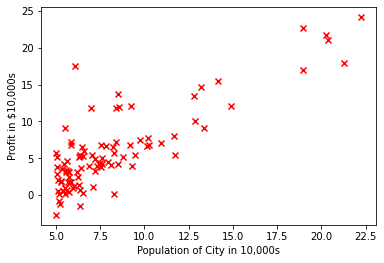

In [5]:
# Plotting the data
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.scatter(X,y, marker='x', color='red')

## Run Gradient Descent

In [6]:
# m = number of training examples
# n = number of features
m = np.size(X,0)
n = np.size(X,1)

# Add a ones column to X
X = np.append(np.ones((m, 1)), X, axis=1)

# Initializa theta as 0s
theta = np.zeros((n+1, 1))

In [7]:
iterations = 1500
alpha = 0.01

### Computing the cost

We use the computeCost function

In [8]:
print('When theta=[0, 0] the computeCost value is %.2f' %computeCost(X,y, theta))
print('Expected cost value (approx) 32.07\n')


When theta=[0, 0] the computeCost value is 32.07
Expected cost value (approx) 32.07



In [9]:
print('When theta=[-1 ,2] the computeCost value is %.2f' %computeCost(X,y, [[-1], [2]]))
print('Expected cost value (approx) 54.24\n')

When theta=[-1 ,2] the computeCost value is 54.24
Expected cost value (approx) 54.24



### Run gradient descent

In [10]:
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

In [11]:
print('Theta found by gradient descent:', theta)

print('Expected theta values (approx)\n');
print('[-3.6303, 1.1664]');

Theta found by gradient descent: [[-3.63029144]
 [ 1.16636235]]
Expected theta values (approx)

[-3.6303, 1.1664]


### Plotting data and using it to do predictions

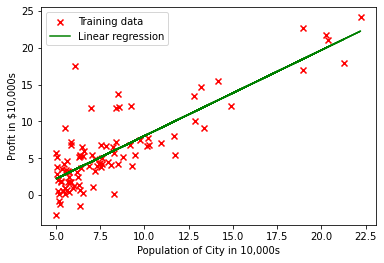

In [12]:
# Plotting the data
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.scatter(X[:,1],y, marker='x', color='red')
plt.plot(X[:,1],X.dot(theta), color='green')
plt.legend(['Training data', 'Linear regression'])

In [13]:
print('for population 35,000, we predict a profit of ', np.dot([1, 3.5], theta)*10000)
print('for population 70,000, we predict a profit of ', np.dot([1, 7], theta)*10000)

for population 35,000, we predict a profit of  [4519.7678677]
for population 70,000, we predict a profit of  [45342.45012945]


## Visualizing some graphs

### Cost versus iterations

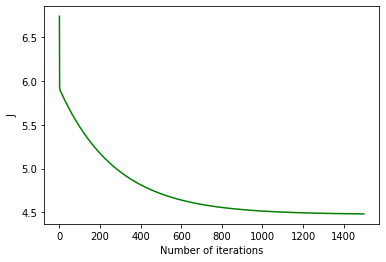

In [14]:
plt.xlabel('Number of iterations')
plt.ylabel('J')
plt.plot(np.arange(0, iterations, 1), J_history, color='green')

### Visualizing $J(\theta)$

In [15]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta0_vals),len(theta1_vals)))




In [16]:
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = ([[theta0_vals[i]], [theta1_vals[j]]])
        J_vals[i, j] = computeCost(X, y, t)
J_vals = J_vals.T

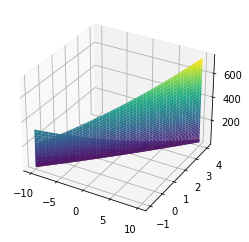

In [17]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis',
                       linewidth=0)

Text(0.5, 1.0, 'Contour, showing minimum')

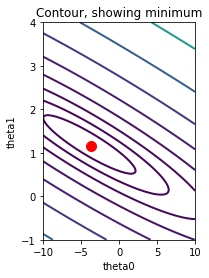

In [18]:
ax = plt.subplot(122)
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
plt.title('Contour, showing minimum')

# Programming Exercise 1: Linear Regression with multiple variables

## Load the dataset

In [19]:
# Importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from linearRegression import *

In [20]:
# header=None as the imported data has no header. Otherwise Pandas considers the first row of data as the header
data = pd.read_csv('ex1data2.txt', header=None)

In [21]:
data.describe()

,0,1,2
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [22]:
# Convert the data into a numpy array
X = data.iloc[:,:-1].to_numpy()

# I am not totally sure why I have to put the [] on [-1]. On this way I have a list of vectors also on y
y = data.iloc[:,[-1]].to_numpy()

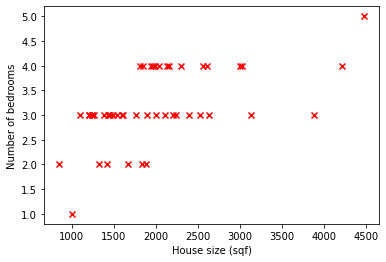

In [23]:
## Plot the data
plt.xlabel('House size (sqf)')
plt.ylabel('Number of bedrooms')
plt.scatter(X[:,0],X[:,1], marker='x', color='red')

## Normalize the data

We'll be normalizing the data using both our own function in the linearRegression.py library and the minmax scaling from sklearn

In [24]:
# Normalizing the data using our own function
Xnorm = normalizeData(X)
ynorm = normalizeData(y)

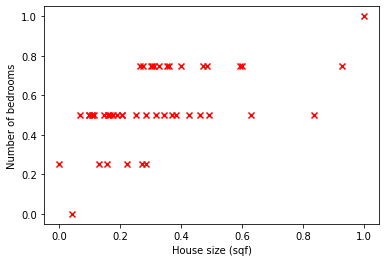

In [25]:
## Plot the normalized data
plt.xlabel('House size (sqf)')
plt.ylabel('Number of bedrooms')
plt.scatter(Xnorm[:,0],Xnorm[:,1], marker='x', color='red')

In [26]:
# Normalizing the data using min-max scaling from sklearn
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
y_SKnorm = mms.fit_transform(y)
X_SKnorm = mms.fit_transform(X)

# It is important to understand the following:
# From https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
# mms.fit -> Compute the minimum and maximum to be used for later scaling
# mms.fit_transform ->  Fit to data, then transform it
# mms.transform ->  Scale features of X according to feature_range
# this helps to transform a test dataset or any new data point

In [27]:
mms.transform([[1650, 3]])

array([[0.22007722, 0.5       ]])

## Standardize the data

As on the normalization part we'll be standardizing the data using both our own function in the linearRegression.py library and the StandardScaler scaling from sklearn

In [28]:
# Standardizing the data using our own function
Xstd = standardizeData(X)
ystd = standardizeData(y)

In [29]:
# Standardizing the data using min-max scaling from sklearn
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_SKstd = stdsc.fit_transform(X)
y_SKstd = stdsc.fit_transform(y)

### Run Gradient descent on the normalized dataset

In [30]:
# m = number of training examples
# n = number of features
m = np.size(Xnorm,0)
n = np.size(Xnorm,1)

# Add a ones column to Xnorm
X = np.append(np.ones((m, 1)), Xnorm, axis=1)

# Initializa theta as 0s
theta = np.zeros((n+1, 1))

In [31]:
# Choose some alpha value
# alpha = 0.01 in the case the convergence speed is much lower! It needs num_iters = 2500 to reach the normalEquation result
# alpha = 0.1 in the case the convergence speed is fast! with 400 iters it converges!
alpha = 0.1
num_iters = 500

In [32]:
# Run Gradient descent
theta, J_history = gradientDescent(X, y, theta, alpha, num_iters)

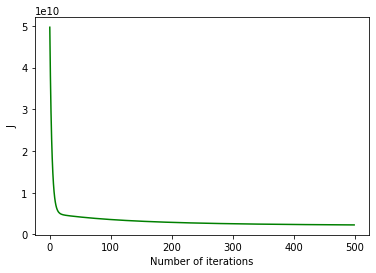

In [33]:
plt.xlabel('Number of iterations')
plt.ylabel('J')
plt.plot(np.arange(0, num_iters, 1), J_history, color='green')

## Make a prediction

Once we have found $\theta$ using use it to make a price prediction for a 1650-square-foot house with 3 bedrooms.

In [34]:
print('for a 1650-square-foot house with 3 bedrooms, we predict a price of ', np.dot(np.append([1], mms.transform([[1650, 3]])), theta))

for a 1650-square-foot house with 3 bedrooms, we predict a price of  [298336.15910797]


Note that I had to normalize the input value

## Testing the values using Coursera Ex1 Test Cases

In [35]:
# Testing the cases using corsera: https://www.coursera.org/learn/machine-learning/discussions/all/threads/5wftpZnyEeWKNwpBrKr_Fw
X1 = np.array([[2, 1, 3], [7, 1, 9], [1, 8, 1], [3, 7, 4]])
y1 = np.array([[2] , [5] , [5] ,[6]])
theta_test = np.array([[0.4], [0.6],[0.8]])
computeCost( X1, y1, theta_test )

array([5.295])

In [36]:
X2 = np.array([[2, 1, 3], [7, 1, 9], [1, 8, 1], [3, 7, 4]])
y2 = np.array([[2], [5],[5],[6]])
theta, J_history = gradientDescent(X2, y2, np.array([[0.1],[-0.2],[0.3]]), 0.01, 10)
theta

array([[0.1855552 ],
       [0.50436048],
       [0.40137032]])

In [37]:
J_history

array([3.63254683, 1.76609451, 1.02151689, 0.64100838, 0.41530551,
       0.27229629, 0.1793844 , 0.11847852, 0.07842877, 0.05206495])